In [6]:
import shap
import pandas as pd
data = pd.read_csv('data.csv')
data_copy = data.copy()
del data_copy['City_name']
data_copy
data_x = data_copy.copy()
data_y = data_copy['eco_value']

In [13]:
data_x

,Average_node_connectivity,City_degree,Edge_number,Nature_connectivity,Average_short_length,Algebraic_connectivity,node_connectivity,connectivity_loss,size_of_largest_component
0,4.703297,13,48,5.287729,1.472527,2.359041,3,0.0,14
1,5.418182,10,38,5.072531,1.309091,3.000000,3,0.0,11
2,2.345455,10,21,2.410666,1.618182,1.172301,2,0.0,11
3,2.095238,6,11,1.812041,1.476190,1.000000,1,0.0,7
4,1.941520,18,38,2.965315,1.777778,1.000000,1,0.0,19
...,...,...,...,...,...,...,...,...,...
1003,2.441667,15,38,3.702870,1.683333,1.000000,1,0.0,16
1004,2.102941,16,34,3.113271,1.750000,1.000000,1,0.0,17
1005,2.025641,12,25,2.768758,1.679487,1.000000,1,0.0,13
1006,1.800000,5,8,1.433710,1.466667,1.000000,1,0.0,6


In [14]:
data_y

0       101.9
1       102.1
2       102.0
3       101.9
4       102.1
        ...  
1003    100.3
1004    101.6
1005     99.9
1006    100.5
1007     99.8
Name: eco_value, Length: 1008, dtype: float64

In [16]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score 
model = xgb.XGBRegressor(max_depth=6,learning_rate=0.05,n_estimators=100,randam_state=42)
model.fit(data_x,data_y)
scores = cross_val_score(model, X=data_x, y=data_y, verbose=0, cv = 5, scoring='neg_mean_squared_error')
scores.mean()

[16:48:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "randam_state" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:48:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "randam_state" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:48:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "randam_state" } might not be used.

  Thi

-1.9411996002939156

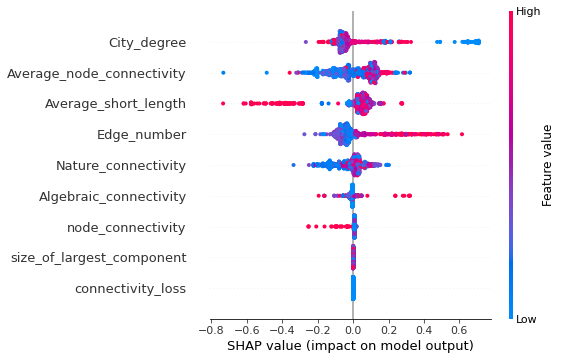

In [18]:
explainer = shap.TreeExplainer(model)
# # compute SHAP values
explainer = shap.Explainer(model, data_x)
shap_values = explainer(data_x)
shap.summary_plot(shap_values, data_x)

In [21]:
shap_values

.values =
array([[ 0.17749234, -0.00682216,  0.2315485 , ...,  0.00327007,
         0.        ,  0.        ],
       [-0.01853662, -0.02342017,  0.27469767, ...,  0.0041212 ,
         0.        ,  0.        ],
       [-0.05153265, -0.05613048, -0.04017093, ...,  0.00755543,
         0.        ,  0.        ],
       ...,
       [-0.0408319 , -0.0428005 , -0.07607013, ...,  0.00721026,
         0.        ,  0.        ],
       [-0.04421704, -0.11502919, -0.04571594, ...,  0.00765752,
         0.        ,  0.        ],
       [-0.48766708,  0.0356045 , -0.13084805, ...,  0.00525041,
         0.        ,  0.        ]])

.base_values =
array([100.77491352, 100.77491352, 100.77491352, ..., 100.77491352,
       100.77491352, 100.77491352])

.data =
array([[ 4.7032967 , 13.        , 48.        , ...,  3.        ,
         0.        , 14.        ],
       [ 5.41818182, 10.        , 38.        , ...,  3.        ,
         0.        , 11.        ],
       [ 2.34545455, 10.        , 21.        , .

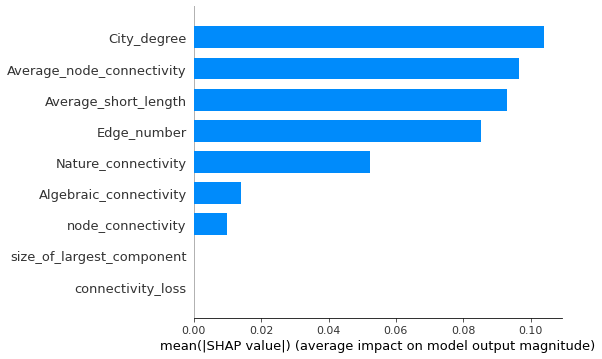

In [19]:
shap.summary_plot(shap_values, data_x, plot_type="bar")